# Classification Iris avec un K-NN

Quelques packages importants

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors

Ici, on utilise le dataset Iris de sklearn. Il est formé de 150 fleurs dont chacune possède 4 caractéristiques différentes (sepal length en cm, sepal width en cm, petal length en cm et petal width en cm) et fait partie d'une classe distincte 'setosa', 'versicolor' ou 'virginica'.

In [27]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(f"{X.shape = }, {y.shape = }")
print(f"{np.unique(y) = }")

X.shape = (150, 4), y.shape = (150,)
np.unique(y) = array([0, 1, 2])


Ensuite, on définit les hyperparamètres de notre K-NN.

In [28]:
n_neighbors = 15
weights = "uniform"

Maintenant, on crée notre K-NN et on le fit (entraîne) sur les données d'Iris. À Noté que l'entraînement du K-NN est seulement une mise en mémoire des données, car le modèle de K-NN fait ses prédictions directement en comparant une nouvelle donnée avec celles du dataset.

In [29]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

Ici, on crée une petite fonction servant à afficher les frontières de décisions sur les caractéristiques des sépales. Il est à noter que le code pourrait facilement être modifié pour afficher les autres caractéristiques.

In [62]:
def show_decision_boundaries(clf, features_idx=(0, 1)):
	h = 1  # step size in the mesh
	# Create color maps
	cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
	cmap_bold = ["darkorange", "c", "darkblue"]
	# Plot the decision boundary. For that, we will assign a color to each
	# point in the mesh [x_min, x_max]x[y_min, y_max].
	x_min_list = [X[:, i].min() - 1 for i in range(X.shape[-1])]
	x_max_list = [X[:, i].max() + 1 for i in range(X.shape[-1])]
	# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
	xx_vec = [np.arange(x_min, x_max, h) for x_min, x_max in zip(x_min_list, x_max_list)]
	[print(f"{v.shape = }") for v in xx_vec]
	xx_list = np.meshgrid(*xx_vec)

	Z = clf.predict(np.c_[tuple([xx.ravel() for xx in xx_list])])
	print(f"{Z.shape = }")
	# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

	# Put the result into a color plot
	Z = Z.reshape(xx_list[features_idx[0]].shape)
	print(f"{Z[:, :, 0, 0].shape = }, {xx_list[features_idx[0]].shape = }")
	plt.figure(figsize=(8, 6))
	plt.contourf(xx_list[features_idx[0]][:, :, 0, 0], xx_list[features_idx[1]][:, :, 0, 0], Z[:, :, 0, 0], cmap=cmap_light)

	# Plot also the training points
	sns.scatterplot(
		x=X[:, features_idx[0]],
		y=X[:, features_idx[1]],
		hue=iris.target_names[y],
		palette=cmap_bold,
		alpha=1.0,
		edgecolor="black",
		# s=10,
	)
	plt.xlim(xx_list[features_idx[0]].min(), xx_list[features_idx[0]].max())
	plt.ylim(xx_list[features_idx[1]].min(), xx_list[features_idx[1]].max())
	plt.title(f"Classification (k = {n_neighbors}, weights = {clf.weights})")
	plt.xlabel(iris.feature_names[features_idx[0]])
	plt.ylabel(iris.feature_names[features_idx[1]])
	plt.show()

On affiche ces frontières de décisions construitent en faisant la prédiction (classification) de tous les points dans l'espace basé sur les données d'entraînement.

v.shape = (6,)
v.shape = (5,)
v.shape = (8,)
v.shape = (5,)
Z.shape = (1200,)
Z[:, :, 0, 0].shape = (5, 6), xx_list[features_idx[0]].shape = (5, 6, 8, 5)


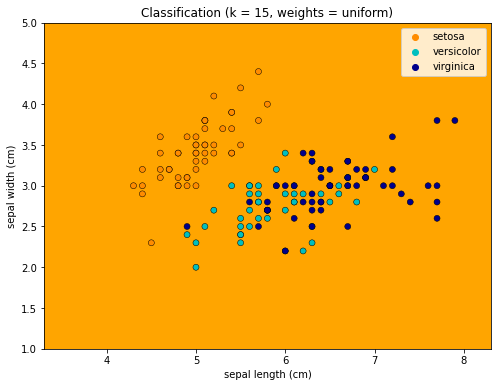

In [63]:
show_decision_boundaries(clf)

On refait le même travail, mais avec une distribution de poids différentes.

In [32]:
n_neighbors = 15
weights = "distance"
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)
show_decision_boundaries(clf)

ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

In [33]:
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform", p=4)
clf.fit(X, y)
show_decision_boundaries(clf)

ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.